### Week 10 | Linear Regression 2 | data : electricity-consumptions

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HP\AppData\Local\Temp\ipykernel_13604\3692993455.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('electricity-consumptions.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   home_size                 10 non-null     int64
 1   kilowatt_hours_per_month  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


In [4]:
df.head()

home_size  kilowatt_hours_per_month
0       1290                      1182
1       1350                      1172
2       1470                      1264
3       1600                      1493
4       1710                      1571

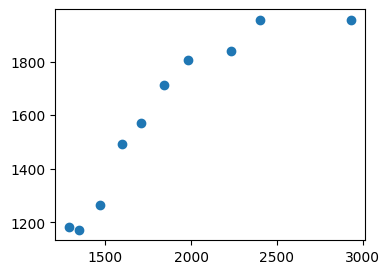

In [5]:
plt.figure(figsize=[4,3])
plt.scatter(df['home_size'],df['kilowatt_hours_per_month'])
plt.show()

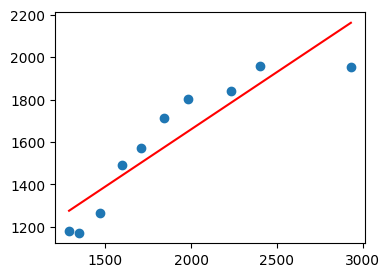

In [6]:
# import LinearRegression
from sklearn.linear_model import LinearRegression

#set att and label
att = df[['home_size'] ]
label = df['kilowatt_hours_per_month']

# create model
model = LinearRegression()

# train model
model.fit(att,label)

# set ans
ans = model.predict(att)

#Plot
plt.figure(figsize=[4,3])
plt.scatter(df['home_size'],df['kilowatt_hours_per_month'])
plt.plot(att,ans,c='r')
plt.show()

In [7]:
# model Predict
ans

array([1275.92041138, 1308.33867463, 1373.17520113, 1443.4147715 ,
       1502.84825413, 1573.0878245 , 1648.73043875, 1783.80653562,
       1875.6582815 , 2162.01960687])

In [8]:
# จุดตัดแกน
a = model.intercept_

# 
b = model.coef_

In [9]:
# ค่าความแม่นยำ
score = model.score(att , label)
score

0.831705383789123

In [10]:
# ค่าความคลาดเคลื่อน
err = 1 - score
err

0.16829461621087705

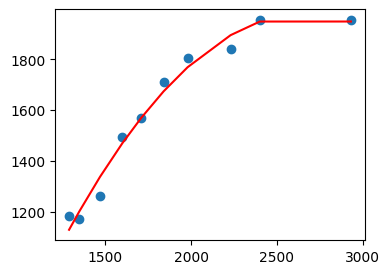

In [11]:
# เปลี่ยนเป็นอาเส้นโค้งให้มาตรงเพื่อให้ทำนายเยอะขึ้น

#import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

#set att and label
att = df[['home_size'] ]
label = df['kilowatt_hours_per_month']

# set pf and train pf to att_new
pf = PolynomialFeatures(degree=2)
pf.fit(att)
att_new = pf.transform(att)


# create model
model = LinearRegression()

# train model
model.fit(att_new,label)

# set ans
ans = model.predict(att_new)

# Plot
plt.figure(figsize=[4,3])
plt.scatter(df['home_size'],df['kilowatt_hours_per_month'])
plt.plot(att,ans,c='r')
plt.show()

In [12]:
# ค่าความแม่นยำ
score = model.score(att_new , label)
score


0.9818850241163605

In [13]:
# ค่าความคลาดเคลื่อน
err = 1 - score
err

0.018114975883639528

In [14]:
df.sample(frac=0.7)

home_size  kilowatt_hours_per_month
7       2230                      1840
5       1840                      1711
9       2930                      1954
1       1350                      1172
2       1470                      1264
4       1710                      1571
6       1980                      1804